In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading and cleaning the data
raw_data =  pd.read_csv('flavors_of_cacao.csv')
raw_data.dropna()
raw_data = raw_data.replace(np.NaN, 'others')

# Renaming for simplicity of code
new_names = ['company','origin','ref','review_date','cocoa_percentage',
'location','rating','bean_type','broad_bean_origin']
data = raw_data.rename(columns=dict(zip(raw_data.columns, new_names)))

# Transform string '90%' to float 0.9
data['cocoa_percentage'] = data['cocoa_percentage'].apply(lambda x: float(x[:-1])/100)

print(data.describe(include = 'all'))


       company      origin          ref  review_date  cocoa_percentage  \
count     1795        1795  1795.000000  1795.000000       1795.000000   
unique     416        1039          NaN          NaN               NaN   
top       Soma  Madagascar          NaN          NaN               NaN   
freq        47          57          NaN          NaN               NaN   
mean       NaN         NaN  1035.904735  2012.325348          0.716983   
std        NaN         NaN   552.886365     2.927210          0.063231   
min        NaN         NaN     5.000000  2006.000000          0.420000   
25%        NaN         NaN   576.000000  2010.000000          0.700000   
50%        NaN         NaN  1069.000000  2013.000000          0.700000   
75%        NaN         NaN  1502.000000  2015.000000          0.750000   
max        NaN         NaN  1952.000000  2017.000000          1.000000   

       location       rating bean_type broad_bean_origin  
count      1795  1795.000000      1795              

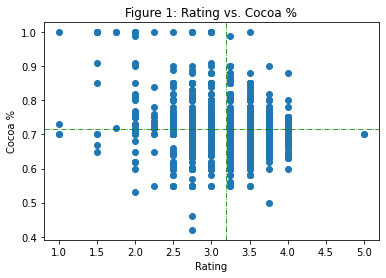

In [5]:
# Distribution of the rating depending on the cocoa percentage
plt.scatter(data['rating'], data['cocoa_percentage'])
plt.axhline(data['cocoa_percentage'].mean(), color='g', linestyle='-.', linewidth=0.8)
plt.axvline(data['rating'].mean(), color='g', linestyle='-.', linewidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Cocoa %')
plt.title('Figure 1: Rating vs. Cocoa %')

plt.show()


Main producers :  U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: location, dtype: int64


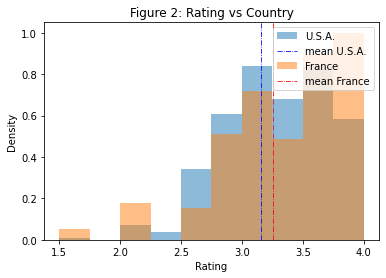

In [6]:
# Selection of the location where most chocolate if produced 
countries = data['location'].value_counts()
print('Main producers : ', countries.head()) # First 2 producers are USA and France

usa_data = data[data['location'] == "U.S.A."] # Filter of the data for USA only
france_data = data[data['location'] == "France"] # Filter of the data for France only

# Distribution of rating per country
plt.hist(usa_data['rating'], alpha=0.5, label='U.S.A.', density=True)
plt.axvline(usa_data['rating'].mean(), color='b', linestyle='-.', linewidth=0.8, label='mean U.S.A.')
plt.hist(france_data['rating'], alpha=0.5, label='France', density=True)
plt.axvline(france_data['rating'].mean(), color='r', linestyle='-.', linewidth=0.8, label='mean France')
plt.legend(loc='upper right')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Figure 2: Rating vs Country')

plt.show()

Main origins :  Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: broad_bean_origin, dtype: int64


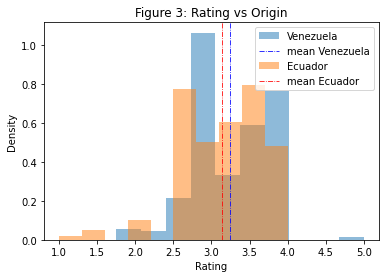

In [7]:
# Selecting the countries where most of the beans are coming from
origins = data['broad_bean_origin'].value_counts()
print('Main origins : ', origins.head()) # First 2 are Ecuador and Venezuela

ecuador_data = data[data['broad_bean_origin'] == 'Ecuador'] # Filter the data for Ecuador only
venezuela_data = data[data['broad_bean_origin'] == 'Venezuela'] # Filter the data for Venezuela only

# Distribution of the rating depending on the beans origin
plt.hist(venezuela_data['rating'], alpha=0.5, label='Venezuela', density=True)
plt.axvline(venezuela_data['rating'].mean(), color='b', linestyle='-.', linewidth=0.8, label='mean Venezuela')
plt.hist(ecuador_data['rating'], alpha=0.5, label='Ecuador', density=True)
plt.axvline(ecuador_data['rating'].mean(), color='r', linestyle='-.', linewidth=0.8, label='mean Ecuador')
plt.legend(loc='upper right')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Figure 3: Rating vs Origin')

plt.show()

Text(0.5, 1.0, 'Figure 4: Cocoa percentage distribution for a rating >= 4')

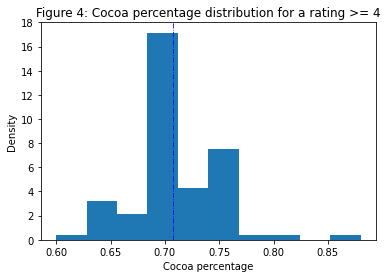

In [8]:
# Filtering the products that have a rating >= 4
highest_quality = data[data['rating'] >= 4]

# Distribution of the cocoa percentage for only the highest ratings
plt.hist(highest_quality['cocoa_percentage'], density=True)
plt.axvline(highest_quality['cocoa_percentage'].mean(), color='b', linestyle='-.', linewidth=0.8)
plt.xlabel('Cocoa percentage')
plt.ylabel('Density')
plt.title('Figure 4: Cocoa percentage distribution for a rating >= 4')



Main companies :  Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: company, dtype: int64


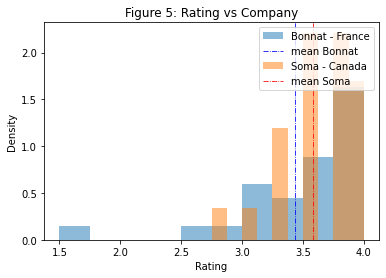

In [9]:
# Selecting the companies that produce to most 
companies = data['company'].value_counts()
print('Main companies : ', companies.head()) # First 2 are Soma and Bonnat

soma_data = data[data['company'] == 'Soma']
bonnat_data = data[data['company'] == 'Bonnat']
soma_country = soma_data['location'].unique()[0]
bonnat_country = bonnat_data['location'].unique()[0]

# Distribution of rating for the main procuders
plt.hist(bonnat_data['rating'], alpha=0.5, label='Bonnat - ' + bonnat_country, density=True)
plt.axvline(bonnat_data['rating'].mean(), color='b', linestyle='-.', linewidth=0.8, label='mean Bonnat')
plt.hist(soma_data['rating'], alpha=0.5, label='Soma - '+ soma_country, density=True)
plt.axvline(soma_data['rating'].mean(), color='r', linestyle='-.', linewidth=0.8, label='mean Soma')
plt.legend(loc='upper right')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Figure 5: Rating vs Company')

plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

data_no_rating = data.drop(['rating'], axis=1) # drop the rating to produce the train data 
values = data_no_rating.values 
label = data['rating'].values # select on the rating to produce the labels 

columns_to_categ = [0, 1, 5, 6, 7] # column that are still a string
# transforming the strings into ints thanks to the LabelEncoder
label_encoder = LabelEncoder()
for col in columns_to_categ:
    values[:,col] = label_encoder.fit_transform(values[:,col])

# Perform a One-Hot encoding
one_hot_encoder = OneHotEncoder()
values = one_hot_encoder.fit_transform(values).toarray()

# Split the dataset into train and test datasets
values_train, values_test, label_train, label_test = train_test_split(values, label, test_size=0.05, random_state=0)

# Performs a random forest
reg = LinearRegression().fit(values_train, label_train)
print('score train : ', reg.score(values_train, label_train))
print('score test : ', reg.score(values_test, label_test))
model = RandomForestRegressor().fit(values_train, label_train)
print('score train : ', model.score(values_train, label_train))
print('score test : ', model.score(values_test, label_test))

score train :  0.9682380092833826
score test :  -5.889014021702248e+24
score train :  0.8915045599542804
score test :  0.028993822898877086


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Regressor = Sequential()
Regressor.add(Dense(units = 1024, activation = 'softmax'))
Regressor.add(Dense(units = 256, activation = 'softmax'))
Regressor.add(Dense(units= 64, activation = 'softmax'))
Regressor.add(Dense(units = 16, activation = 'softmax'))
Regressor.add(Dense(units = 1, activation = 'linear'))
Regressor.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history = Regressor.fit(values_train, label_train, batch_size = 42, epochs = 30, shuffle = True, validation_data = (values_test, label_test))


Epoch 1/30
41/41 [==============================] - 1s 16ms/step - loss: 1.6186 - mae: 0.9168 - val_loss: 0.2288 - val_mae: 0.3737
Epoch 2/30
41/41 [==============================] - 0s 12ms/step - loss: 0.2413 - mae: 0.3938 - val_loss: 0.2131 - val_mae: 0.3670
Epoch 3/30
41/41 [==============================] - 0s 12ms/step - loss: 0.2312 - mae: 0.3853 - val_loss: 0.2170 - val_mae: 0.3606
Epoch 4/30
41/41 [==============================] - 0s 12ms/step - loss: 0.2303 - mae: 0.3847 - val_loss: 0.2178 - val_mae: 0.3603
Epoch 5/30
41/41 [==============================] - 1s 12ms/step - loss: 0.2296 - mae: 0.3834 - val_loss: 0.2124 - val_mae: 0.3647
Epoch 6/30
41/41 [==============================] - 1s 12ms/step - loss: 0.2307 - mae: 0.3844 - val_loss: 0.2124 - val_mae: 0.3658
Epoch 7/30
41/41 [==============================] - 1s 12ms/step - loss: 0.2317 - mae: 0.3860 - val_loss: 0.2141 - val_mae: 0.3624
Epoch 8/30
41/41 [==============================] - 1s 13ms/step - loss: 0.2301 - m

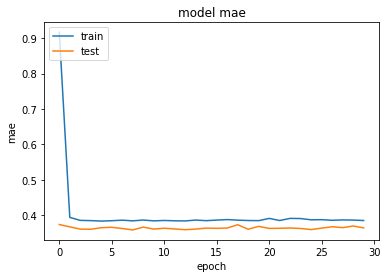

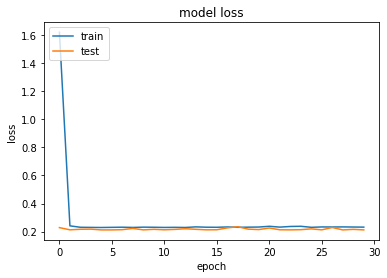

In [16]:
def print_history(history):
    # summarize history for accuracy
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model mae')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
print_history(history)


Epoch 1/10
41/41 [==============================] - 2s 33ms/step - loss: 1.1129 - mae: 0.7613 - val_loss: 0.3158 - val_mae: 0.4184
Epoch 2/10
41/41 [==============================] - 1s 31ms/step - loss: 0.2487 - mae: 0.3924 - val_loss: 0.2963 - val_mae: 0.4377
Epoch 3/10
41/41 [==============================] - 1s 31ms/step - loss: 0.0912 - mae: 0.2380 - val_loss: 0.2585 - val_mae: 0.4060
Epoch 4/10
41/41 [==============================] - 1s 32ms/step - loss: 0.0495 - mae: 0.1688 - val_loss: 0.2558 - val_mae: 0.3929
Epoch 5/10
41/41 [==============================] - 1s 35ms/step - loss: 0.0274 - mae: 0.1278 - val_loss: 0.2270 - val_mae: 0.3784
Epoch 6/10
41/41 [==============================] - 2s 39ms/step - loss: 0.0204 - mae: 0.1082 - val_loss: 0.2346 - val_mae: 0.3841
Epoch 7/10
41/41 [==============================] - 1s 37ms/step - loss: 0.0168 - mae: 0.0961 - val_loss: 0.2336 - val_mae: 0.3774
Epoch 8/10
41/41 [==============================] - 2s 38ms/step - loss: 0.0161 - m

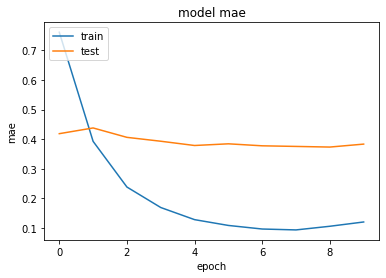

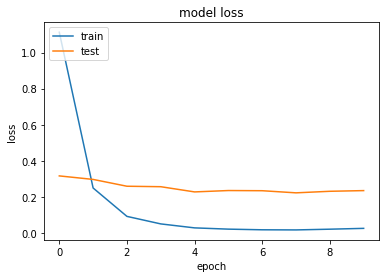

In [13]:
Regressor_2 = Sequential()
Regressor_2.add(Dense(units = 2048, activation = 'relu'))
Regressor_2.add(Dense(units = 1024, activation = 'relu'))
Regressor_2.add(Dense(units = 256, activation = 'relu'))
Regressor_2.add(Dense(units= 64, activation = 'relu'))
Regressor_2.add(Dense(units = 48, activation = 'relu'))
Regressor_2.add(Dense(units = 16, activation = 'relu'))
Regressor_2.add(Dense(units = 1, activation = 'linear'))
Regressor_2.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history_2 = Regressor_2.fit(values_train, label_train, batch_size = 42, epochs = 10, shuffle = True, validation_data = (values_test, label_test))
print_history(history_2)

In [14]:
import tensorflow as tf 
Regressor_3 = Sequential()
Regressor_3.add(Dense(units = 2048, activation = 'relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.1)))
Regressor_3.add(Dense(units = 1024, activation = 'relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.1)))
Regressor_3.add(Dense(units = 256, activation = 'relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.1)))
Regressor_3.add(Dense(units= 64, activation = 'relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.1)))
Regressor_3.add(Dense(units = 48, activation = 'relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.1)))
Regressor_3.add(Dense(units = 16, activation = 'relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.1)))
Regressor_3.add(Dense(units = 1, activation = 'linear'))
Regressor_3.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history_3 = Regressor_3.fit(values_train, label_train, batch_size = 10, epochs = 10, shuffle = True, validation_data = (values_test, label_test))

print_history(history_3)

Epoch 1/10
 24/171 [===>..........................] - ETA: 8s - loss: 199.0456 - mae: 1.5141

KeyboardInterrupt: 